# ***DESI Human Glioma Dataset Preprocessing***

This notebook shows the preprocessing of the DESI Human Glioma Dataset.

### ***Import packages***

Before we begin, let"s import all the necessary packages for this notebook.
First we add the directory which has our python files:

In [1]:
import sys
sys.path.insert(0, "/sise/assafzar-group/assafzar/Leor/NanoBiopsy")

Next we import all the necessary packages for this notebook:

In [2]:
from os import listdir
from os.path import dirname, realpath, join
from pathlib import Path
from pyimzml.ImzMLParser import ImzMLParser
from pyimzml.ImzMLWriter import ImzMLWriter
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from nnbiopsy.spectra_utils.normalization import TICNormalizer
from nnbiopsy.spectra_utils.binning import EqualWidthBinning
%matplotlib inline

### ***Constants definitions***

Next, let"s define some constant variables for this notebook:

In [3]:
# Define folder that contains the dhg dataset
DHG_IN_PATH = "/sise/assafzar-group/assafzar/Leor/DHG/Original"
# Define folder to save preprocess output
DHG_OUT_PATH = "/sise/assafzar-group/assafzar/Leor/DHG/Normalized"
# Define mass range start value
MZ_START = 50
# Define mass range end value
MZ_END = 1200
# # Define mass resolution of the data
MASS_RESOLUTION = 0.025

### ***Creating DHG_OUT_PATH folder***

Next, lets create the DHG_OUT_PATH folder:

In [4]:
# Create DHG_OUT_PATH folder if doesn"t exist
Path(DHG_OUT_PATH).mkdir(parents=True, exist_ok=True)

### ***Getting all msi names preprocess pipeline***

Next, lets get all the msi names from DHG_IN_PATH:

In [5]:
# Get all msi names
msi_names = [file for file in listdir(DHG_IN_PATH) if file.endswith(".imzML")]

### ***Creating preprocess variables for each preprocess step***

Next, lets create a variable for for each preprocess step:

In [6]:
# Get normalizer object
normalizer = TICNormalizer()
# Get binning object
binning = EqualWidthBinning(MZ_START, MZ_END, MASS_RESOLUTION / 2)

### ***Visualizing preprocess on single spectra***

Next, lets visualize the preprocess pipeline for a single spectra:

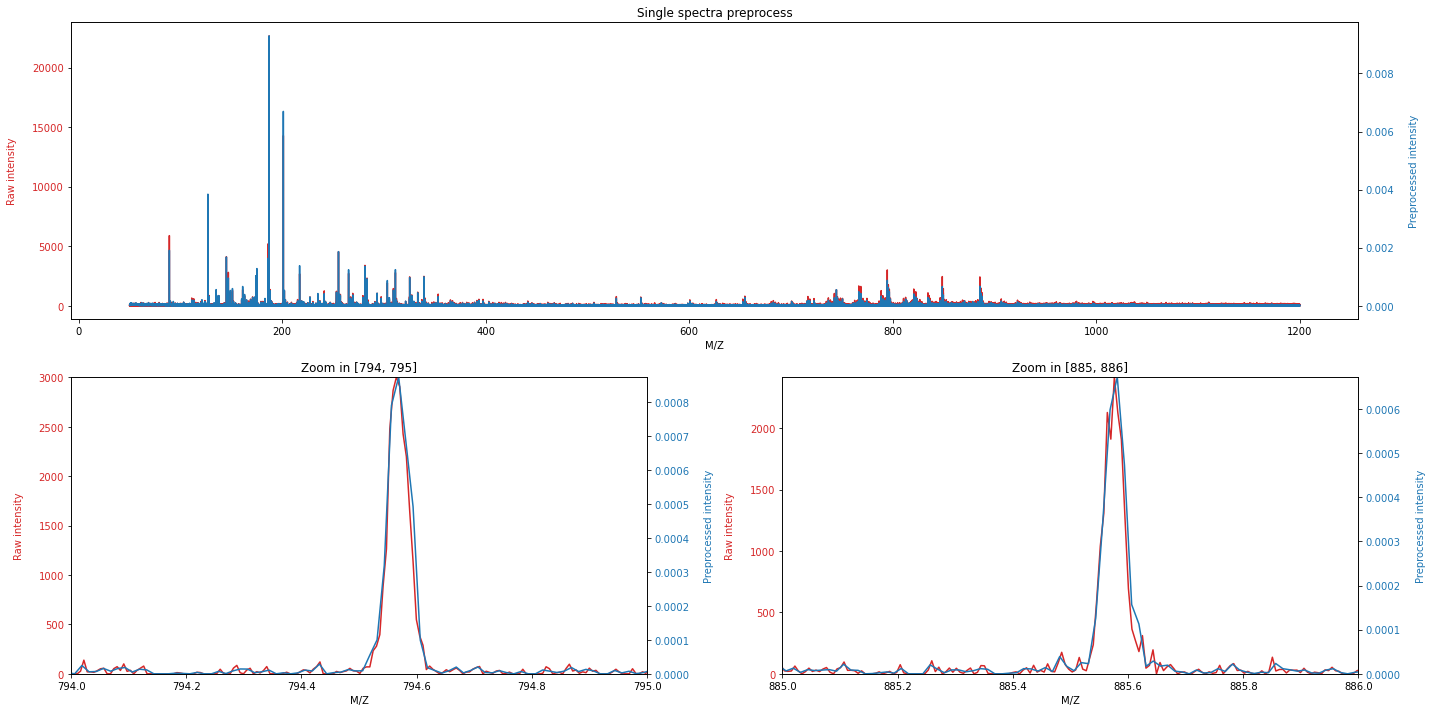

In [7]:
with ImzMLParser(join(DHG_IN_PATH, msi_names[0])) as reader:
  # Get single spectra
  raw_mzs, raw_intensities = reader.getspectrum(2999)

  # Preprocess spectrum
  preprocessed_mzs, preprocessed_intensities = binning.bin(
    normalizer.normalize(
      (raw_mzs, raw_intensities)
    )
  )
  
  # Create plot
  fig = plt.figure(figsize=(20, 10))

  # Define colors for lines
  color_raw = "tab:red"
  color_preprocessed = "tab:blue"
  
  # Get zoom in area for top left plot
  lower_1 = 794
  upper_1 = 795
  idx_1_1 = (raw_mzs >= lower_1) & (raw_mzs <= upper_1)
  idx_1_2 = (preprocessed_mzs >= lower_1) & (preprocessed_mzs <= upper_1)

  # Get zoom in area for top right plot
  lower_2 = 885
  upper_2 = 886
  idx_2_1 = (raw_mzs >= lower_2) & (raw_mzs <= upper_2)
  idx_2_2 = (preprocessed_mzs >= lower_2) & (preprocessed_mzs <= upper_2)

  # Top Plot
  sub1_1 = fig.add_subplot(2,2,(1,2))
  sub1_1.plot(raw_mzs, raw_intensities, color=color_raw)
  sub1_1.tick_params(axis="y", labelcolor=color_raw)
  sub1_1.set_xlabel("M/Z")
  sub1_1.set_ylabel("Raw intensity", color=color_raw, labelpad = 15)

  sub1_2 = sub1_1.twinx()
  sub1_2.plot(preprocessed_mzs, preprocessed_intensities, color=color_preprocessed)
  sub1_2.tick_params(axis="y", labelcolor=color_preprocessed)
  sub1_2.set_ylabel("Preprocessed intensity", color=color_preprocessed, labelpad = 15)
  
  # Bottom left plot
  sub2_1 = fig.add_subplot(2,2,3)
  sub2_1.plot(raw_mzs, raw_intensities, color=color_raw)
  sub2_1.tick_params(axis="y", labelcolor=color_raw)
  sub2_1.set_xlim(lower_1, upper_1)
  sub2_1.set_ylim(raw_intensities[idx_1_1].min(), raw_intensities[idx_1_1].max())
  sub2_1.set_xlabel("M/Z")
  sub2_1.set_ylabel("Raw intensity", color=color_raw, labelpad = 15)

  sub2_2 = sub2_1.twinx()
  sub2_2.plot(preprocessed_mzs, preprocessed_intensities, color=color_preprocessed)
  sub2_2.tick_params(axis="y", labelcolor=color_preprocessed)
  sub2_2.set_xlim(lower_1, upper_1)
  sub2_2.set_ylim(preprocessed_intensities[idx_1_2].min(), preprocessed_intensities[idx_1_2].max())
  sub2_2.set_ylabel("Preprocessed intensity", color=color_preprocessed, labelpad = 15)

  # Bottom right plot
  sub3_1 = fig.add_subplot(2,2,4)
  sub3_1.plot(raw_mzs, raw_intensities, color=color_raw)
  sub3_1.tick_params(axis="y", labelcolor=color_raw)
  sub3_1.set_xlim(lower_2, upper_2)
  sub3_1.set_ylim(raw_intensities[idx_2_1].min(), raw_intensities[idx_2_1].max())
  sub3_1.set_xlabel("M/Z")
  sub3_1.set_ylabel("Raw intensity", color=color_raw, labelpad = 15)

  sub3_2 = sub3_1.twinx()
  sub3_2.plot(preprocessed_mzs, preprocessed_intensities, color=color_preprocessed)
  sub3_2.tick_params(axis="y", labelcolor=color_preprocessed)
  sub3_2.set_xlim(lower_2, upper_2)
  sub3_2.set_ylim(preprocessed_intensities[idx_2_2].min(), preprocessed_intensities[idx_2_2].max())
  sub3_2.set_ylabel("Preprocessed intensity", color=color_preprocessed, labelpad = 15)

  
  # Plots titles
  sub1_1.set_title("Single spectra preprocess")
  sub2_1.set_title(f"Zoom in [{lower_1}, {upper_1}]")
  sub3_1.set_title(f"Zoom in [{lower_2}, {upper_2}]")
  
  # Show plot
  plt.tight_layout()
  plt.show()

### ***Creating preprocess pipeline***

Next, lets create the preprocess pipeline for each spectra in the image:

In [8]:
# Create preprocess pipe
pre_process_pipe = (
  lambda mzs, intensities: (
    binning.bin(
      normalizer.normalize((mzs, intensities))
    )
  )
)

### ***Applying preprocess pipeline on each msi***

Next, lets apply the preprocess pipeline for each spectra in each msi in dhg:

In [ ]:
# Loop over each msi name
for msi_name in tqdm(msi_names, desc="Image Loop"):
  # Create a new preprocessed msi. because we apply binning 
  # we can use mode="continuous"
  with ImzMLWriter(join(DHG_OUT_PATH, msi_name), mode="continuous") as writer:
    # Parse the msi file
    with ImzMLParser(join(DHG_IN_PATH, msi_name)) as reader:
      # Loop over each spectra in msi
      for idx, (x, y, z) in tqdm(enumerate(reader.coordinates),
                                 total=len(reader.coordinates),
                                 desc="Spectra Loop"):
        # Read spectra
        raw_mzs, raw_intensities = reader.getspectrum(idx)
        # Apply preprocessing pipe
        preprocessed_mzs, preprocessed_intensities = pre_process_pipe(raw_mzs, raw_intensities)
        # Write processed spectra to new preprocessed msi
        writer.addSpectrum(preprocessed_mzs, preprocessed_intensities, (x, y, z))

Image Loop:   0%|          | 0/16 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/7482 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/10220 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/14196 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/7938 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/12920 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/6095 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/24024 [00:00<?, ?it/s]